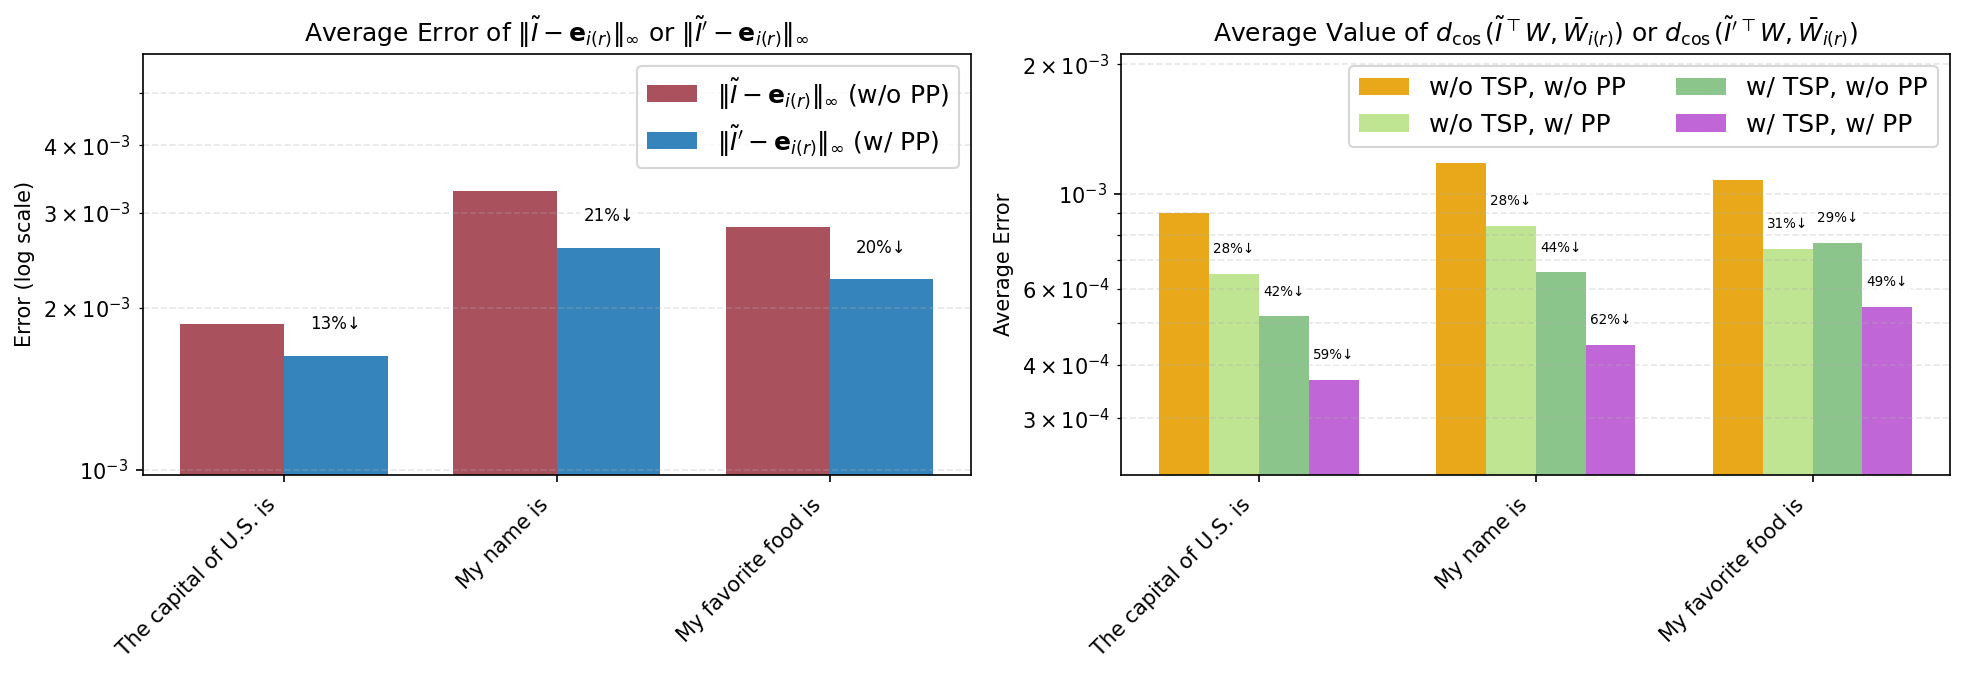

In [7]:
import numpy as np
import matplotlib.pyplot as plt

prompts = ['The capital of U.S. is ', 'My name is ', 'My favorite food is ']

# Approx error (I, I') - with and without PP, without TSP
empirical_I_no_PP_no_TSP   = [1.866822e-03, 3.286857e-03, 2.825521e-03]
empirical_I_with_PP_no_TSP    = [1.629806e-03, 2.584909e-03, 2.257543e-03]

# Cosine distance between the approximated embedding and the target embedding (with and without TSP and PP)
empirical_cos_no_PP_no_TSP   = [9.000628e-04, 1.174607e-03, 1.074149e-03]
empirical_cos_with_PP_no_TSP    = [6.501597e-04, 8.400734e-04, 7.448717e-04]
empirical_cos_no_PP_with_TSP = [5.181124e-04, 6.556499e-04, 7.663001e-04]
empirical_cos_with_PP_with_TSP  = [3.688678e-04, 4.439617e-04, 5.452794e-04]

def annotate_bar_pair_drop(ax, x_no, h_no, x_with, h_with, *,
                           text_kw=None, lift=1.08, fmt_thresh=10.0):
    text_kw = dict(ha='center', va='bottom', fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8)) | (text_kw or {})
    eps = 1e-18
    pct = max(0.0, (1.0 - (h_with / max(h_no, eps))) * 100.0)
    pct_txt = f"{pct:.0f}%↓" if pct >= fmt_thresh else f"{pct:.1f}%↓"
    ax.text(x_with, h_with * lift, pct_txt, **text_kw)

def annotate_rel_to_first(ax, x_ref, h_ref, x_target, h_target, *,
                          text_kw=None, lift=1.08, fmt_thresh=10.0):
    text_kw = dict(ha='center', va='bottom', fontsize=6.5,
                   bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8)) | (text_kw or {})
    eps = 1e-18
    pct = max(0.0, (1.0 - (h_target / max(h_ref, eps))) * 100.0)
    pct_txt = f"{pct:.0f}%↓" if pct >= fmt_thresh else f"{pct:.1f}%↓"
    ax.text(x_target, h_target * lift, pct_txt, **text_kw)

x = np.arange(len(prompts))
fig, axes = plt.subplots(1, 2, figsize=(13.2, 4.6), dpi=150)

lift = 1.10

ax = axes[0]
bar_w = 0.38

bars_no = ax.bar(x - bar_w/2, empirical_I_no_PP_no_TSP, width=bar_w,
                     label=r"$\|\tilde{I}-\mathbf{e}_{i(r)}\|_\infty$ (w/o PP)", alpha=0.9, color='#A13E4C')
bars_with  = ax.bar(x + bar_w/2, empirical_I_with_PP_no_TSP,  width=bar_w,
                     label=r"$\|\tilde{I}'-\mathbf{e}_{i(r)}\|_\infty$ (w/ PP)",  alpha=0.9, color='#1f77b4')

for i in range(len(prompts)):
    hb = empirical_I_no_PP_no_TSP[i]
    ha = empirical_I_with_PP_no_TSP[i]
    annotate_bar_pair_drop(ax, x[i] - bar_w/2, hb, x[i] + bar_w/2, ha, lift=lift)

ax.set_title(r"Average Error of $\|\tilde{I}-\mathbf{e}_{i(r)}\|_\infty$ or $\|\tilde{I}'-\mathbf{e}_{i(r)}\|_\infty$")
ax.set_ylabel('Error (log scale)')
ax.set_xticks(x)
ax.set_xticklabels(prompts, rotation=45, ha='right')

vals_left = empirical_I_no_PP_no_TSP + empirical_I_with_PP_no_TSP
ymin = max(min(vals_left)*0.6, 1e-6)
ymax = max(vals_left)*1.8
ax.set_yscale('log')
ax.set_ylim(ymin, ymax)
ax.grid(True, axis='y', which='both', linestyle='--', alpha=0.3)
ax.legend(loc='upper right', fontsize=12)

ax = axes[1]

w = 0.18
offsets = np.array([-1.5*w, -0.5*w, 0.5*w, 1.5*w])

B1 = empirical_cos_no_PP_no_TSP
B2 = empirical_cos_with_PP_no_TSP
B3 = empirical_cos_no_PP_with_TSP
B4 = empirical_cos_with_PP_with_TSP

bars1 = ax.bar(x + offsets[0], B1, width=w, label='w/o TSP, w/o PP', alpha=0.9, color='#E69F00')
bars2 = ax.bar(x + offsets[1], B2, width=w, label='w/o TSP, w/ PP',  alpha=0.9, color='#B8E186')
bars3 = ax.bar(x + offsets[2], B3, width=w, label='w/ TSP, w/o PP', alpha=0.9, color='#7FBF7F')
bars4 = ax.bar(x + offsets[3], B4, width=w, label='w/ TSP, w/ PP',  alpha=0.9, color='#BA55D3')

for i in range(len(prompts)):
    ref_h = B1[i]
    annotate_rel_to_first(ax, x[i] + offsets[0], ref_h, x[i] + offsets[1], B2[i], lift=lift)
    annotate_rel_to_first(ax, x[i] + offsets[0], ref_h, x[i] + offsets[2], B3[i], lift=lift)
    annotate_rel_to_first(ax, x[i] + offsets[0], ref_h, x[i] + offsets[3], B4[i], lift=lift)

ax.set_title(r"Average Value of $d_{\cos}(\tilde{I}^{\top}W, \bar{W}_{i(r)})$ or $d_{\cos}(\tilde{I}'^{\top}W, \bar{W}_{i(r)})$")
ax.set_ylabel('Average Error')
ax.set_xticks(x)
ax.set_xticklabels(prompts, rotation=45, ha='right')

vals_right = B1 + B2 + B3 + B4
ymin = max(min(vals_right)*0.6, 1e-6)
ymax = max(vals_right)*1.8
ax.set_yscale('log')
ax.set_ylim(ymin, ymax)
ax.grid(True, axis='y', which='both', linestyle='--', alpha=0.3)
ax.legend(loc='upper right', fontsize=12, ncols=2)

plt.tight_layout()
plt.show()
